In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from graphviz import Source
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from matplotlib import rcParams

In [71]:
f=open(r"C:\Users\Brendan\Downloads\data.txt")

In [72]:
with open(r"C:\Users\Brendan\Downloads\data.txt") as f:
    contents = f.readlines()
contents[1000:]

['Scarlett\n',
 '1 pts (4 BPS)\n',
 'Pope\n',
 '6 pts (20 BPS)\n',
 'Schar\n',
 '9 pts (28 BPS)\n',
 'Burn\n',
 '5 pts (19 BPS)\n',
 'Botman\n',
 '6 pts (24 BPS)\n',
 'Trippier\n',
 '7 pts (27 BPS)\n',
 'Willock\n',
 '1 pts (3 BPS)\n',
 'Guimaraes\n',
 '3 pts (13 BPS)\n',
 'Joelinton\n',
 '3 pts (8 BPS)\n',
 'Targett\n',
 '9 pts (28 BPS)\n',
 'Wood\n',
 '2 pts (6 BPS)\n',
 'Wilson\n',
 '2 pts (6 BPS)\n',
 'Saint-Maximin\n',
 '1 pts (3 BPS)\n',
 'Fraser\n',
 '1 pts (3 BPS)\n',
 'Lloris\n',
 '6 pts (21 BPS)\n',
 'Romero\n',
 '5 pts (19 BPS)\n',
 'Rodon\n',
 '6 pts (18 BPS)\n',
 'Dier\n',
 '6 pts (22 BPS)\n',
 'Doherty\n',
 '6 pts (26 BPS)\n',
 'Hojbjerg\n',
 '3 pts (18 BPS)\n',
 'Bentancur\n',
 '3 pts (12 BPS)\n',
 'Perisic\n',
 '6 pts (25 BPS)\n',
 'Moura\n',
 '1 pts (2 BPS)\n',
 'Kane\n',
 '2 pts (6 BPS)\n',
 'Son\n',
 '2 pts (6 BPS)\n',
 'Kulusevski\n',
 '1 pts (3 BPS)\n',
 'Bergwijn\n',
 '1 pts (3 BPS)\n',
 'Scarlett\n',
 '1 pts (4 BPS)\n',
 'Pope\n',
 '3 pts (12 BPS)\n',
 'Burn\n',


In [73]:
pdata={'Ramsdale': [2,
  0,
  6,
  2,
  5,
  7,
  2,
  2,
  7,
  2,
  2,
  7,
  6,
  2,
  5,
  7,
  1,
  6,
  6,
  7,
  6,
  3],
 'Tomiyasu': [2,
  1,
  7,
  2,
  6,
  6,
  2,
  2,
  9,
  2,
  2,
  6,
  7,
  2,
  6,
  6,
  1,
  6,
  6,
  6,
  6,
  2],
 'White': [2, 0, 9, 2, 6, 6, 2, 2, 2, 2, 10, 6, 1, 6, 8, 6, 9, 6, 6, 2],
 'Saliba': [2, 9, 2, 6, 7, 1, 6, 2, 2, 8, 8, 1, 6, 6, 1, 6, 5, 7, 6, 2],
 'Tierney': [10,
  1,
  6,
  2,
  12,
  12,
  2,
  2,
  6,
  9,
  4,
  6,
  7,
  1,
  11,
  6,
  1,
  10,
  7,
  6,
  6,
  6],
 'Lokonga': [2,
  2,
  3,
  2,
  3,
  3,
  11,
  2,
  3,
  1,
  2,
  3,
  3,
  1,
  3,
  3,
  2,
  6,
  3,
  3,
  3,
  2],
 'Partey': [2, 2, 6, 2, 7, 3, 2, 6, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1],
 'Saka': [6, 2, 10, 0, 3, 3, 7, 2, 6, 2, 1, 6, 2, 1, 3, 1, 2, 3, 3, 6, 3, 2],
 'Odegaard': [2, 2, 3, 2, 0, 2, 1, 3, 7, 2, 6, 3, 13, 16, 3, 10, 10],
 'Martinelli': [1, 5, 3, 8, 0, 0, 15, 3, 3, 5, 3, 3, 1, 6, 1, 10],
 'Jesus': [1,
  2,
  2,
  2,
  9,
  8,
  9,
  9,
  16,
  1,
  5,
  17,
  9,
  2,
  6,
  2,
  2,
  13,
  2,
  9,
  2,
  2],
 'Cedric': [1, 1, 1, 1, 1, 1, 1, 1, 0],
 'Vieira': [1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2],
 'Nketiah': [1, 1, 1, 4, 1, 1, 0],
 'Bazunu': [4, 4, 3, 7, 2, 1, 2, 2, 1, 3, 2, 2, 4, 1, 3, 7, 7, 1, 6, 3, 10, 3],
 'Livramento': [2,
  7,
  1,
  9,
  1,
  0,
  1,
  2,
  0,
  2,
  2,
  0,
  2,
  0,
  1,
  7,
  6,
  1,
  6,
  1,
  6,
  2],
 'Salisu': [2, 2, 1, 6, 1, 1, 1, 2, -1, 2, 2, 1, 2, 1, 1, 6, 6, 1, 9, 1, 5, 2],
 'Stephens': [1, 2, 1, 2, 1],
 'Perraud': [6, 0, 5],
 'Elyounoussi': [1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  0,
  3,
  2],
 'Romeu': [2, 2, 2, 2, 1, 2, 1, 3, 2, -2, 2, 1, 2, 3, 1, 1],
 'Ward-Prowse': [2,
  5,
  2,
  9,
  2,
  2,
  2,
  8,
  2,
  10,
  2,
  2,
  2,
  12,
  2,
  3,
  6,
  2,
  3,
  2,
  3,
  9],
 'Walcott': [1, 3, 2, 2, 2, 1, 2, 3],
 'Broja': [9, 1, 1, 2, 2, 1, 7, 2, 1, 1, 6, 0, 2, 6, 2, 2, 7, 1, 2, 2, 2, 2],
 'Adams': [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2],
 'Redmond': [1, 6, 2, 4, 1, 2, 1, 5, 1, 2, 6, 2, 2, 2, 1, 3, 1, 1, 3, 2, 3, 2],
 'S Armstrong': [1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 5, 2, 1, 2, 3, 2, 1],
 'A Armstrong': [1,
  1,
  2,
  1,
  1,
  0,
  2,
  1,
  2,
  1,
  2,
  2,
  0,
  2,
  1,
  1,
  1,
  2,
  2,
  0,
  1],
 'Schmeichel': [1, 2, 1, 6, 2, 3, 2, 3, 6, 2, 1, 3, 0, 7, 2, 6, 1, 1, 1],
 'Justin': [1, 9, 4, 7, 1, 11, 12, 5, 13, 1, 1, 7, 2, 15, 1, 1, 13],
 'Amartey': [1, 1, 0, 11, 1, 6, 1],
 'Evans': [0, 6, 2, 6, 2, 1, 1, 6, 4, 1],
 'Thomas': [1, 2, 0, 6, 1, 1, 4, 2, 1, 6, 2, 6, 1, 7],
 'Soumare': [2, 1, 5, 5, 1, 6, 2, 2, 5, 2, 2],
 'Dewsbury-Hall': [2, 1, 5, 3, 18, 5, 7, 7, 2, 2, 2, 14, 2, 6, 6, 8, 5, 2, 2],
 'Tielemans': [12,
  10,
  8,
  11,
  7,
  2,
  10,
  9,
  11,
  13,
  5,
  6,
  15,
  26,
  15,
  13,
  15,
  5,
  5],
 'Maddison': [8, 2, 2, 5, 12, 13, 7, 5, 8, 2, 5, 8, 9, 14, 7, 3, 2, 8, 2],
 'Iheanacho': [2, 8, 8, 1, 13],
 'Daka': [6, 6, 1, 2, 2, 1, 1, 2, 2, 1, 7, 1, 2, 2, 2, 1, 8, 1],
 'Barnes': [1, 15, 1, 3, 8, 1, 7, 15, 14, 2, 1, 5, 9, 3, 1, 3, 1, 2],
 'Perez': [1, 6, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Vardy': [1, 5, 9, 0, 1, 13, 2, 2, 0, 1, 1, 1, 6, 1, 1, 1, 1, 8],
 'Hennessey': [2, 1, 2, 3, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1],
 'Roberts': [1, 0, 4, 1, 1, -1, -1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 11, 0, 1, 1],
 'Tarkowski': [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, -1, 6, -1, 0, 1, 1, -1, 8],
 'Collins': [1, 0, 15, 0, 0, 0, 0, 1, 1, 6, -1, 0, 0, 1, 1, 0, 7],
 'Taylor': [1, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, -1, 2, 0, 1, 3, 1],
 'McNeil': [1, 7, 1, 2, 7, 2, 2, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2, 7, 1],
 'Brownhill': [2, 2, 2, 2, 2, 2, 5, 7, 2, 5, 2, 2, 2, 2, 2, 2, 5, 7, 1],
 'Westwood': [8, 1, 5, 2, 5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1],
 'Cornet': [2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 5],
 'Weghorst': [2, 1, 2, 2, 2, 7, 2, 2, 2, 7, 17, 2, 11, 2, 2, 2, 8, 8, 1],
 'Rodriguez': [13, 2, 2, 2, 7, 2, 1, 2, 2, 2, 1, 1, 2, 2, 8, 0, 1, 2],
 'Lowton': [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 'Gudmundsson': [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4],
 'Vydra': [1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 5, 1],
 'Soyuncu': [1, 1, 1, 8, 2, 1, 6, 8, 4],
 'Cork': [0, 1, 1],
 'Ndidi': [2, 9, 2, 8, 3, 2, 2, 1, 3, 9],
 'Albrighton': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Long': [0, 1],
 'Pereira': [1, 2],
 'Fofana': [1, 2, 2, 2, 6, 2, 16, 6, 8, 0, 6],
 'Castagne': [5, 12, 2, 1, 7],
 'Vestergaard': [2],
 'Lloris': [2, 6, 2, 6, 2, 1, 2, 0, 6, 2, 1, 2, 1, 7, 2, 7, 2, 5],
 'Davies': [2, 7, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 7, 2, 2, 6],
 'Dier': [1, 6, 2, 7, 2, 1, 0, 2, 1, 9, 1, 2, 5],
 'Romero': [2, 8, 2, 6, 2, 1, 1, 1, 8, 2, 1, 2, 1, 1, 2, 6],
 'Doherty': [2, 6, 2, 2, 2, 1, 0, 6, 2, 1, 2, 1, 9, 1, 12, 1, 7],
 'Bissouma': [2, 1, 3, 1, 2, 1, 1, 2, 2, 2, 3, 3, 1],
 'Bentancur': [2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 4, 1, 3, 1, 10, 2, 3],
 'Perisic': [6, 9, 9, 2, 1, 6, 2, 0, 2, 1, 2, 8, 12],
 'Kulusevski': [2, 1, 1, 6, 3, 13, 2, 2, 3, 2, 1, 5, 2, 3, 2, 8, 1, 1],
 'Kane': [9, -2, 9, 9, 2, 2, 7, 2, 9, 2, 2, 2, 1, 2, 7, 7, 2, 4],
 'Son': [1, 9, 1, 3, 3, 12, 5, 1, 6, 2, 2, 9, 2, 3, 2, 5, 7, 3],
 'Moura': [1, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 10],
 'Bergwijn': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4],
 'Hojbjerg': [1, 3, 2, 3, 1, 2, 3, 5, 2, 1, 3],
 'Pope': [3, 2, 2, 2, 9, 4, 3, 10, 3, 10, 2, 2, 6, 9, 3, 3, 2, 3],
 'Schar': [2, 2, 2, -1, 1, 2, 11, 1, 7, 2, 1, 14, 6, 2, 0, 2],
 'Botman': [2, 2, 2, 2, 6, 1, 2, 6, 2, 9, 2, 1, 6, 5, 1, 2, 1],
 'Burn': [2, 2, 2, 2, 6, 1, 2, 6, 2, 6, 2, 1, 6, 6, 2, 2, 1],
 'Trippier': [2, 2, 2, 1, 7, 7, 2, 15, 2, 6, 10, 1, 6, 7, 2, 1, 4, 1],
 'Joelinton': [2, 0, 5, 2, 3, 2, 15, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 1],
 'Guimaraes': [7, 1, 9, 2, 3, 2, 2, 6, 2, 3, 2, 2, 6, 3, 6, 2, 2, 2],
 'Willock': [6, 2, 2, 2, 3, 2, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 5, 2],
 'Targett': [2, 2, 2, 1, 12, 1, 10, 5, 1, 6, 5, 0, 12, 6, 2, 1, 2, 1],
 'Saint-Maximin': [3, 1, 1, 2, 1, 1, 2, 1, 2, 6, 1, 1, 8, 3, 1, 1, 1, 1],
 'Wilson': [2, 2, 1, 2, 2, 7, 2, 6, 1, 2, 7, 2, 1, 1, 1, -1, 9, 2],
 'Fraser': [1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1],
 'Almiron': [1, 1, 1, 6, 1, 1, 1, 1, 1],
 'Wood': [1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 13, 9, 2, 2, 9, 2, 2, 2],
 'Rodon': [6, 2, 1, 6, 6, 6, 2],
 'Sessegnon': [2, 1, 1, 6, 5],
 'Royal': [6],
 'Lascelles': [1, 1],
 'Manquillo': [6, 2, 1],
 'Marquinhos': [1, 1, 1, 6, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Bednarek': [11, 9, 1, 1, 2, 0, 2, 2, 0, 1, 6, 11, 1, 5, 1, 8, 2],
 'Walker-Peters': [2, 2, 6, 1, 1, 4, 2, 0, 2, 1, 1, 2, 1, 9, 15, 1, 0, 9, 2],
 'Tella': [1, 3, 1, 2, 1, 1, 2, 1, 2, 0, 3, 1, 3, 2],
 'Gabriel': [6, 2, 19, 1],
 'Smith-Rowe': [3, 1, 1, 1, 1, 1, 1, 3, 6, 1, 1, 0, 1],
 'Diallo': [1, 1, 1, 1, 1],
 'Ederson': [1, 6, 6, 6, 6, 1, 6, 1, 2, 8, 6, 2],
 'Walker': [9, 6, 21, 6, 13, 1, 8, 1, 1, 27, 12, 2],
 'Ake': [1, 6, 6],
 'Laporte': [1, 6, 7, 15, 1, 7, 7, 2, 6, 6, 2],
 'Zinchenko': [4, 8, 6, 8, 7, 11, 6, 1, 2, 6, 7, 2],
 'Gundogan': [7, 10, 3, 3, 2, 8, 2, 2, 1, 9, 2],
 'Rodri': [7, 3, 3, 5, 3, 4, 6, 5, 2],
 'Silva': [2,
  6,
  16,
  3,
  2,
  3,
  2,
  1,
  3,
  1,
  1,
  1,
  1,
  11,
  10,
  0,
  1,
  6,
  2,
  1,
  1,
  7,
  0,
  6,
  1,
  8,
  6,
  2,
  6,
  1,
  1,
  1,
  7,
  7,
  2,
  1,
  1],
 'Foden': [7, 4, 3, 8, 12, 6, 9, 13, 18, 2, 1],
 'Haaland': [13, -1, 5, 7, 2, 6, 12, 1, 0, 2, 1, 2],
 'Sterling': [5, 1, 3, 1, 1, 2, 3, 15, 2, 1, 3, 2],
 'Mahrez': [1, 3, 1, 3, 1, 1, 1, 6, 2],
 'De Bruyne': [9, 14, 11, 4, 1, 1, 1, 7, 15, 10],
 'Grealish': [4, 3, 1, 6, 2, 1, 1, 4, 6, 1, 1],
 'Meslier': [1, 8, 2, 2, 3, 1, 1, 4, 3, 0, 1, 8],
 'Kristensen': [-1, 1, 1, 1, 1, 0, 1, 1, -1, 0, 6],
 'Cooper': [-1, 1, 1, 0, 0, 1, 1],
 'Llorente': [-1, 1, 1, 1, 1, -1],
 'Firpo': [-1, 1, 1, 1, -3, 0, 1, 1, 3, -1, 1, 9],
 'Aaronson': [2, 2, 2, 2, 2, 2, 5, 2, 2, 3],
 'Roca': [1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3],
 'Raphinha': [5, 2, 1, 2, 1, 7, 2, 7, 2, 2, 2, 11],
 'James': [2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 3],
 'Rodrigo': [7, 2, 1, 1, 5, 2, 2, 2, 1, 2, 5],
 'Bamford': [6, 1, 2, 2, 2, 1, 2, 11, 8, 1, 1, 1],
 'Harrison': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Klich': [4, 1, 1, 1, 1, 7, 1, 1, 1, 2, 1],
 'Dallas': [1, 1, 1, 1, 1],
 'Dias': [6, 6, 2, 5, 1],
 'Alvarez': [1, 1, 1, 2, 2, 1, 4, 1],
 'Struijk': [1, 1, 7],
 'Gelhardt': [2, 2, 2, 1, 1, 2, 1, 1],
 'Stones': [6, 1, 5, 1, 6],
 'Koch': [1, 0, 1, 1, -1, 6],
 'Greenwood': [2, 2],
 'Phillips': [18, 3, 1],
 'Ayling': [1],
 'Cresswell': [0, 1],
 'Mendy': [1, 5, 7, 6, 2, 2, 7, 6, 6, 3, 6, 6, 2, 6, 6, 3],
 'James Che': [17, 15, 11, 14, 14, 8, 15, 8, 7, 10, 6, 15, 2, 15, 11, 5],
 'Chalobah': [2, 5, 5, 5, 2, 7, 9, 7, 2, 6, 13, 2, 2],
 'Chilwell': [2, 14, 6, 7, 2, 2, 5, 6, 6, 2, 6, 14, 2, 6, 11, 2],
 'Kante': [2, 3, 3, 1, 3, 3, 3, 2, 3, 7, 1, 6, 2],
 'Jorginho': [2, 6, 2, 6, 10, 5, 2, 3, 2, 3, 3],
 'Hudson-Odoi': [2, 8, 8, 6, 2, 7, 6, 3, 3, 2, 3, 8, 2, 3, 3, 2],
 'Mount': [5, 6, 3, 7, 1, 10, 1, 7, 10, 20, 9, 3, 2, 6, 0, 8],
 'Pulisic': [8, 1, 6, 1, 2, 1, 6, 3, 6, 9, 3, 6, 2, 1, 8, 1],
 'Havertz': [2, 7, 13, 9, 10, 4, 6, 2, 11, 6, 8, 2, 1, 8, 2, 12],
 'Loftus-Cheek': [6, 1, 1, 2, 3, 6, 0, 1, 4, 1, 8, 1],
 'Barkley': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'Krul': [1, 3, 1, 3, 2, 2, 1, 3, 2, -1, 3, 2, 9, 2, 1, 2],
 'Aarons': [4, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 6, 1, 1],
 'Byram': [1, 6, 1],
 'Hanley': [1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1],
 'Williams': [1, 0, 1, 4, 2, 1, 0, 2, 1, 1, 1],
 'Placheta': [2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2],
 'Normann': [2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2],
 'Rowe': [2, 2, 2, 2, 1, 1, 3],
 'Rashica': [2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2],
 'Pukki': [2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 9, 2, 2, 8],
 'Idah': [8, 2, 2, 2, 7, 8, 2, 2, 2, 5, 2, 2, 1, 2, 2],
 'Sargent': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1],
 'McLean': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 'Tzolis': [1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1],
 'Martinez': [1, 2, 6, 2, 8, 3, 1, 6, 2, 8, 2, 3, 2, 6, 7, 1, 1, 1],
 'Chambers': [2, 2, 2, 7, 1, 1, 7, 2, 6, 1, 1, 0],
 'Carlos': [5, 2, 6, 2, 6, 2, 1, 21, 2, 6, 2, 2, 1, 6, 5, 1, 1, 7],
 'Konsa': [8, 2, 6, 2, 6, 2, 0, 6, 2, 6, 2, 2, 2, 6, 6, 1, 1, 1],
 'Cash': [1, 2, 6, 17, 14, 6, 8, 10, 2, 5, 2, 2, 2, 6, 6, 1, 1, 1],
 'Kamara': [4,
  6,
  3,
  2,
  6,
  6,
  2,
  3,
  3,
  2,
  1,
  6,
  -1,
  4,
  -1,
  2,
  1,
  0,
  6,
  5,
  1,
  8],
 'Ramsey': [1, 6, 2, 3, 2, 1, 7, 1, 2],
 'Digne': [5, 2, 10, 2, 6, 2, 0, 6, 2, 8, 2, 2, 7, 11, 5, 1, 1, 4],
 'Buendia': [19, 10, 6, 2, 3, 2, 5, 3, 5, 3, 0, 2, 2, 3, 3, 0, 7, 1],
 'Watkins': [7, 6, 2, 1, 1, 1, 13, 2, 2, 1, 9, 1, 14, 7, 1, 5, 1, 9],
 'Coutinho': [2, 5, 8, 1, 6, 10, 4, 13, 2, 16, 1, 2, 2, 19, 3, 5, 2, 2],
 'Bailey': [4, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
 'Ings': [7, 2, 1, 4, 17, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1],
 'Pickford': [1, 3, 1, 2, 1, 4, 2, 0, 3, 2, 5, 11, 2, 2, 10, 4, 3, 2],
 'Patterson': [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 6, 4, 1, 6, 5, 2],
 'Keane': [0, 1, 0, 2, 0, 0, 2, 0, 6, 6, 10],
 'Mina': [0, 1, 1, 0, 1, 1, 0, 2, 6],
 'Mykolenko': [0, 1, 0, 1, 0, 2, 1, 0, 3, 1, 2, 8, 1, 1, 9, 5, 1, 1],
 'Doucoure': [5, 2, 2, 2, 1, 9, 2, 5, 6, 2, 2, 2, 5, 3, 8],
 'Allan': [1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2],
 'Dele': [2, 2, 2, 2, 5, 2, 2, 2, 2, 3, 3, 2],
 'Gordon': [2, 1, 2, 6, 1, 5, 0, 1, 2, 2, 5, 3, 1, 2, 3, 2, 4, 2],
 'Calvert-Lewin': [1, 8, 2, 2, 2, 2, 2, 1, 1, 2, 7, 1, 2, 2, 2, 2, 2, 2],
 'Richarlison': [2, 2, 2, 2, 1, 9, 5, 2, 8, 2, 2, 4, 2, 1, 2, 9, 8, 10],
 'Coleman': [1, 9, 2, 7, 1, 1, 1, 1],
 'Townsend': [1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
 'Rondon': [7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11],
 'Luiz': [2, 1, 7, 2, 3, 1, 6, 4],
 'McGinn': [2, 0, 6, 2, 5, 1, 1, 1, 1],
 'Godfrey': [1, 1, 2, 1, 2, 1, 8, 2, 0],
 'Gray': [0, 1, 1, 1, 1, 2, 1, 1, 3],
 'Mings': [14, 6, 2, 2, 7, 6],
 'Holgate': [0, 1, 2, 2, 7, 8, 7],
 'Chukwuemeka': [1, 9, 0, 1, 6, 2, 1],
 'Iwobi': [1],
 'Gomes': [2, 2, 2, 6, 2],
 'Raya': [3, 2, 1, 3, 7, 1, 0, 0, 2, 2, 2],
 'Ajer': [2, 0, 1, 5, 6, 6, 1, 1, 0, 10, 2],
 'Pinnock': [2, 1, 1, 2, 6, 0, 0, 1, 1, 2, 2],
 'Jansson': [5, 1, 7, 2, 6, 1, 0, 0, 1, 1, 2],
 'Henry': [17, 1, 4, 8, 7, 3, 3, 1, 2, 2, 2],
 'Janelt': [2, 2, 2],
 'Norgaard': [6, 5, 9, 4, 9, 14, 2, 2, 7],
 'Canos': [5, 7, 12, 7, 1, -1, 1, 1, 5, 8],
 'Eriksen': [7, 5, 2, 1, 3, 1, 8, 2, 5, 1, 1],
 'Wissa': [1, 15, 2, 18, 3, 2, 2, 1, 2, 8, 2],
 'Toney': [2, 6, 1, 12, 1, 2, 5, 2, 8, 2, 2],
 'Forss': [1, 1, 8, 0, 1, 8, 1],
 'Foster': [1, 0, 2, 0, 2, 2, 1, 6, 2, 2, 3],
 'Femenia': [1, 3, 1, -1, 2, 1, 8, 5, 1, 2],
 'Kabasele': [1, -1],
 'Cathcart': [1, 0, 1, 5, 2],
 'Sissoko': [2, 2, 3, 0, 8, 2],
 'Tufan': [2, 2, 2, 2],
 'Sema': [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2],
 'Pedro': [2, 2, 7, 7, 2, 1, 2, 6, 2, 5, 2],
 'Sarr': [2, 6, 1, 6, 8, 2, 2, 1, 23, 3, 2, 7, 6, 2],
 'Dennis': [1, 2, 11, 2, 2, 9, 5, 2, 9, 2, 8],
 'Masina': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 'Cleverley': [6, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1],
 'King': [1, 1, 1, 1, 1, 7, 1, 1, 1],
 'Jensen': [9, 9, 2, 2],
 'Roerslev': [1, 1, 4, 0, 1, 1],
 'Ghoddos': [1, 1, 1, 1, 1, 1, 1, 1],
 'Mbeumo': [1, 13, 2, 2],
 'Troost-Ekong': [-1, 1, 2, 2, 1, 7, 2, 1],
 'Kucka': [12, 2, 2, 2, 16, 2, 2],
 'Sa': [6, 2, 3, 6, 6, 2, 9, 3, 8, 3, 3, 6, 3, 6, 6, 3, 6, 3],
 'Kilman': [8, 9, 2, 6, 6, 2, 6, 8, 7, 2, 2, 6, 2, 1, 6, 2, 9, 2],
 'Coady': [6, 1, 2, 6, 6, 2, 6, 5, 6, 2, 2, 6, 2, 1, 6, 5, 6, 2],
 'Boly': [6, 2, 13, 10, 7, 2, 10, 2, 7, 9, 1, 7, 2],
 'Semedo': [15, 2, 2, 12, 9, 5, 7, 1, 8, 2, 8, 12, 2, 12, 7, 2, 6, 2],
 'Dendoncker': [3, 5, 2, 2, 2, 1, 3, 2, 3, 2, 5, 10, 2, 5, 3, 1, 3, 2],
 'Neves': [9, 5, 1, 2, 3, 2, 3, 3, 11, 3, 2, 1, 3, 1],
 'Ait-Nouri': [6, 8, 10, 1, 1, 10, 5, 2, 6, 2, 6, 2],
 'Neto': [3, 8, 7, 3, 3, 1, 6, 5, 3, 2, 2, 3, 2, 5, 2, 3, 1, 2],
 'Jimenez': [2, 2, 1, 5, 2, 2, 9, 2, 2, 2, 7, 2, 1, 13, 2, 8, 2, 0],
 'Podence': [8, 4, 8, 3, 3, 2, 3, 7, 5, 3, 2, 1, 1, 3, 3, 3, 3, 2],
 'Sanchez': [2,
  1,
  2,
  1,
  6,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  6,
  0,
  2,
  2,
  1,
  7,
  2,
  0,
  6,
  6,
  6,
  13],
 'Lamptey': [1, 1, 9, 1, 2, 2, 6, 2],
 'Webster': [1, 0, 1, 1, 9, 1, 2, 1, 2, 11, 1, 2, 9, 0, 2, 2, 6, 15],
 'Dunk': [1, 1, 1, 1, 5, 2, 2, 9, 1, 2, 0, 2, 9, 7, 2, 2, 6, 6],
 'Cucurella': [1, 0, 1, 1, 6, 8, 2, 1, 2, 2, 1, 2, 7, 3, 2, 8, 5, 10],
 'Mwepu': [2, 3, 2, 1, 2, 5, 3, 1, 2, 1, 3],
 'Alzate': [2, 10, 4, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3],
 'Moder': [2, 5, 2, 2, 3, 2, 2, 2, -1, 2, 2, 2, 2, 3],
 'MacAllister': [0, 1, 2, 1, 1, 2, 2, 4, 1, 2, 1, 2, 8, 1, 2, 2, 3, 3],
 'Maupay': [2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0],
 'Trossard': [2, 1, 1, 2, 3, 2, 2, 2, 0, 4, 10, 2, 6, 2, 2, 2, 3, 3],
 'Gross': [1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 0, 1, -1, 1, 1, 0, 1],
 'Lallana': [1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 6, 1, 7, 1, 1],
 'Caicedo': [1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3],
 'Chiquinho': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3],
 'Gibbs-White': [1, 1, 1, 1, 2, 2, 2, 3, 3, 2],
 'Undav': [1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2],
 'Mosquera': [2, 7, 1],
 'Jonny': [12, 6, 1, 6, 7, 6, 6, 0],
 'Hwang': [1, 1, 1, 1, 1, 1, 2, 2, 5, 1, 1, 1, 1],
 'Kovacic': [3, 3, 3, 2, 2, 3, 2, 2],
 'Werner': [2, 4, 2, 2],
 'Omobamidele': [0, 1, 1, 1, 1, 1, 0, 2, 5, 1, 1],
 'Lees-Melou': [2, 2, 2, 2, 2, 1, 2, 2, 1, 6, 1, 2, 2],
 'Gibson': [1, 1, 1, 2, 0, 1],
 'Giannoulis': [1, 1, 1, -1, 6],
 'Veltman': [7, 2, 2, 0, 2, 1, 0, 1, 8, 6],
 'Colwill': [2],
 'Kabak': [0],
 'Dowell': [1, 1, 2],
 'Onyeka': [2, 3, 2, 1],
 'Baptiste': [2, 3, 2, 2],
 'Samir': [-1, 2, 1, 6, 2, 1, 2],
 'Louza': [2, 8, 6, 2],
 'Ngakia': [2, 4],
 'Bidstrup': [2, 2, 5],
 'Kayembe': [2],
 'Winks': [2],
 'Tanganga': [1, 1, 6, 6],
 'Sorensen': [1],
 'Scarlett': [1, 1, 1, 1, 1, 2],
 'Pepe': [1, 0]}

In [74]:

i=int(0)
key=int(0)
che=["Mendy","Chalobah","Silva"]
for x in contents:
    x=x.replace("\n","")
    if 'James' in x:
        for y in che:
            if y in (contents[i-2]) :
                x="James Che"
                continue       
    if i%2==0:
        try:
            if x not in pdata:  
                pdata.setdefault(x,[])
                pdata[x]=[int(contents[i+1][:2])]
            else:
                pdata[x].append(int(contents[i+1][:2]))
        except:
            False
    i=i+1

In [75]:
mean=[]
for x in pdata:
    mean.append(np.array(pdata[x]).mean())

In [76]:
longest = max(len(item) for item in pdata.values())
for x in pdata:
    while len(pdata[x])!=longest:
        pdata[x].append(np.nan)

In [77]:
new = pd.DataFrame.from_dict(pdata)

In [78]:
new=new.astype(float)

In [79]:
pd.options.display.max_columns = new.shape[1]
newd=new.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9],include='all').transpose().sort_values(by='mean',ascending=False).round(1)

In [80]:

newd=newd[newd["count"]>5]

In [81]:
newd=newd.transpose()
newd

,James Che,Tielemans,Alexander-Arnold,Chilwell,Salah,Shaw,Robertson,Castagne,Walker,Maddison,Zinchenko,Fernandes,Semedo,Diaz,Chalobah,Cash,Ake,Digne,Sancho,Boly,Laporte,Jesus,Justin,Sarr,Gabriel,Fornals,Iheanacho,Mount,Havertz,Barnes,Jonny,Foden,Coutinho,Carlos,Konate,van Dijk,Gundogan,Stones,De Bruyne,Dennis,Dias,Rodri,Mings,Dewsbury-Hall,Ronaldo,Mendy,Martinelli,Silva,Darwin,Saliba,Ait-Nouri,Mahrez,Toney,Kilman,Sterling,Werner,Sa,Tierney,Odegaard,Rodon,Thomas,Haaland,Pedro,Trippier,Canos,Wissa,Buendia,Perisic,Watkins,Eriksen,Ederson,Pope,Norgaard,de Gea,Konsa,Phillips,Tomiyasu,Fofana,Doherty,Martinez,Mbeumo,Saka,Elliott,Kucka,Jensen,Fabinho,Kane,Amartey,Targett,McTominay,Coady,Varane,Hudson-Odoi,Ramsdale,Tanganga,Louza,Ward-Prowse,Matip,Alcantara,Kante,Partey,Schar,Kovacic,Dalot,Chambers,Soyuncu,Webster,Perraud,Alisson,Fabianski,Son,Dier,Luiz,Podence,Jimenez,Jorginho,Sanchez,White,Neves,Henry,Bazunu,Ndidi,Guimaraes,Daka,Sessegnon,Grealish,Cucurella,Romero,Femenia,Henderson,Lloris,Neto,Botman,Oko-Flex,Lindelof,Burn,Vardy,McGinn,Weghorst,Dunk,Milner,Ramsey,Janelt,Ngakia,Kulusevski,Pulisic,Rice,Evans,Onyeka,Dendoncker,Fred,Vestergaard,Lamptey,Gilmour,McCarthy,McNeil,Joelinton,Wood,Soumare,Veltman,Richarlison,Holgate,Soucek,Benrahma,Rashford,Pinnock,Doucoure,Pickford,Raphinha,Wilson,Livramento,Bentancur,Gomes,Kamara,Calvert-Lewin,Alzate,Trossard,Westwood,Gordon,Smith-Rowe,Schmeichel,Bowen,Sissoko,Lokonga,Alvarez,Broja,Dele,Hojbjerg,Pukki,Bidstrup,Olise,Bednarek,Brownhill,Bamford,Eze,Gallagher,Giannoulis,Chukwuemeka,Butland,Foster,Loftus-Cheek,Dawson,Elanga,Redmond,Stephens,Walker-Peters,Tufan,Mateta,Baptiste,Krul,Willock,Coleman,Cornet,Romeu,Aaronson,Mwepu,Meslier,Keita,Ings,Tsimikas,Idah,Keane,Milivojevic,Ajer,Sema,Vieira,Walcott,Rodriguez,Lascelles,Moura,Saint-Maximin,Adams,Cathcart,Jansson,Coufal,Moder,Normann,McArthur,Jota,Salisu,Davies,MacAllister,Ward,Rodrigo,Roca,Mykolenko,Lees-Melou,Marquinhos,Cleverley,Rashica,Raya,Carvalho,Allan,S Armstrong,Bissouma,Hughes,Samir,Caicedo,Vydra,Lallana,Ayling,Patterson,Troost-Ekong,Almiron,Rowe,Gibbs-White,Cox,Ramsay,Placheta,Godfrey,Mina,Tella,Elyounoussi,Greenwood,Masina,King,Forss,Cresswell,James,A Armstrong,Edouard,Bailey,Hennessey,Dallas,Gelhardt,Byram,Barkley,Tarkowski,Collins,Townsend,Perez,Hwang,Pepe,Rondon,Antonio,Fraser,Scarlett,Klich,Gudmundsson,Maupay,Kabasele,Undav,Nketiah,Harrison,Sargent,Williams,Gray,Gross,Kabak,Aarons,Hanley,Chiquinho,Benteke,Ghoddos,Taylor,Omobamidele,Gibson,Lowton,Roberts,Bergwijn,Albrighton,Cooper,Tzolis,Dowell,Diallo,Firpo,McLean,Cedric,Schlupp,Roerslev,Kristensen,Guehi,Koch,Llorente,Mitchell,Andersen,Struijk
count,75.0,51.0,45.0,75.0,46.0,8.0,46.0,12.0,88.0,51.0,88.0,8.0,18.0,46.0,65.0,47.0,26.0,47.0,8.0,13.0,76.0,74.0,48.0,63.0,13.0,7.0,12.0,75.0,75.0,50.0,8.0,74.0,47.0,47.0,26.0,45.0,75.0,6.0,78.0,46.0,68.0,67.0,16.0,51.0,8.0,75.0,63.0,146.0,42.0,67.0,12.0,47.0,47.0,18.0,80.0,32.0,18.0,74.0,56.0,16.0,39.0,81.0,47.0,46.0,45.0,47.0,47.0,35.0,46.0,46.0,88.0,46.0,39.0,8.0,47.0,22.0,74.0,35.0,43.0,47.0,7.0,73.0,40.0,30.0,15.0,46.0,46.0,17.0,46.0,7.0,18.0,6.0,75.0,74.0,10.0,19.0,74.0,21.0,15.0,55.0,74.0,43.0,37.0,7.0,32.0,19.0,18.0,9.0,46.0,8.0,46.0,35.0,21.0,18.0,18.0,49.0,31.0,68.0,14.0,47.0,37.0,33.0,45.0,48.0,9.0,63.0,18.0,41.0,45.0,25.0,46.0,18.0,40.0,6.0,6.0,45.0,46.0,26.0,51.0,18.0,18.0,17.0,15.0,6.0,45.0,75.0,8.0,25.0,17.0,18.0,6.0,6.0,8.0,13.0,37.0,51.0,46.0,45.0,24.0,10.0,43.0,16.0,8.0,8.0,8.0,47.0,39.0,47.0,88.0,46.0,74.0,45.0,8.0,80.0,47.0,18.0,18.0,51.0,47.0,52.0,19.0,8.0,26.0,72.0,59.0,73.0,31.0,33.0,75.0,14.0,46.0,56.0,51.0,87.0,46.0,46.0,18.0,12.0,41.0,47.0,62.0,7.0,7.0,74.0,18.0,65.0,15.0,45.0,9.0,75.0,46.0,23.0,50.0,61.0,84.0,11.0,88.0,44.0,43.0,13.0,74.0,32.0,46.0,47.0,47.0,37.0,16.0,47.0,6.0,44.0,44.0,73.0,20.0,47.0,7.0,14.0,75.0,31.0,31.0,70.0,48.0,18.0,78.0,82.0,85.0,47.0,58.0,33.0,45.0,75.0,13.0,18.0,41.0,67.0,25.0,30.0,28.0,13.0,50.0,17.0,22.0,36.0,33.0,13.0,31.0,10.0,35.0,20.0,61.0,26.0,20.0,38.0,72.0,12.0,45.0,39.0,26.0,26.0,84

In [82]:
allp=newd.columns

In [83]:
allp

Index(['James Che', 'Tielemans', 'Alexander-Arnold', 'Chilwell', 'Salah',
       'Shaw', 'Robertson', 'Castagne', 'Walker', 'Maddison',
       ...
       'Cedric', 'Schlupp', 'Roerslev', 'Kristensen', 'Guehi', 'Koch',
       'Llorente', 'Mitchell', 'Andersen', 'Struijk'],
      dtype='object', length=337)

In [93]:
pd.DataFrame(newd[['Trippier','Doherty']]).transpose().sort_values(by='mean',ascending=False).transpose()

,Trippier,Doherty
count,46.0,43.0
mean,4.6,4.2
std,3.4,3.6
min,1.0,0.0
10%,1.0,1.0
20%,2.0,1.0
30%,2.0,1.6
40%,2.0,2.0
50%,4.0,2.0
60%,6.0,6.0


In [85]:
pd.DataFrame(newd[['Kane','Haaland','Ronaldo','Toney','Richarlison','Adams','Jimenez','Idah','Watkins','Jota','Mateta','Pukki','Bamford','Daka','Maupay','Havertz','Wood','Dennis','Ings','Broja','Calvert-Lewin','Wilson','Rodrigo','Weghorst','Darwin','Undav','Jesus']]).transpose().sort_values(by='mean',ascending=False).transpose()

,Jesus,Havertz,Dennis,Ronaldo,Darwin,Toney,Haaland,Watkins,Kane,Jimenez,Daka,Weghorst,Wood,Richarlison,Wilson,Calvert-Lewin,Pukki,Broja,Bamford,Mateta,Ings,Adams,Idah,Rodrigo,Jota,Maupay,Undav
count,74.0,75.0,46.0,8.0,42.0,47.0,81.0,46.0,46.0,18.0,48.0,51.0,45.0,43.0,46.0,47.0,75.0,73.0,87.0,45.0,43.0,73.0,74.0,82.0,31.0,18.0,17.0
mean,5.9,5.6,5.3,5.1,5.0,4.8,4.6,4.5,4.1,3.6,3.5,3.3,3.0,2.9,2.8,2.7,2.6,2.6,2.5,2.3,2.2,2.2,2.2,2.1,2.1,1.4,1.4
std,4.6,4.6,4.3,3.6,4.1,3.5,4.4,4.3,3.8,3.5,3.8,3.9,3.2,2.5,2.6,2.4,1.9,2.3,2.3,2.0,2.9,1.7,1.6,1.6,2.4,0.7,0.6
min,-1.0,1.0,1.0,0.0,0.0,1.0,-1.0,0.0,-2.0,0.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10%,1.3,2.0,1.5,1.4,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0
20%,2.0,2.0,2.0,2.0,1.2,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.2,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
30%,2.0,2.0,2.0,2.3,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
40%,2.0,2.0,2.0,4.4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
50%,5.0,5.0,2.0,5.5,3.5,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.5,1.0
60%,7.0,6.0,6.0,6.2,6.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,2.0,2.0,2.0,1.0,2.0,1.6


In [86]:
i=int(0)
arr=[]
for y in (3,6,10,15,20):
    arr.append([])
    for x in new.keys():
        arr[i].append(round(new.loc[new[x] > y,x].count()/new[x].count(),2))
    i=i+1

In [87]:
r=['>3','>6','>10','>15','>20']
d=pd.DataFrame(arr,index=r,columns=new.keys())


In [88]:
d[allp].transpose().sort_values(by='>3',ascending=False).transpose()

,James Che,Chilwell,Alexander-Arnold,Chalobah,Walker,Tielemans,Robertson,Jonny,Zinchenko,Mendy,Dias,Ake,Cash,Digne,Laporte,Stones,Maddison,Castagne,Salah,Sancho,Ronaldo,Justin,Mings,Gabriel,Shaw,Konate,Boly,Semedo,Carlos,Ederson,Amartey,Ait-Nouri,Iheanacho,Jesus,Dewsbury-Hall,Diaz,Sarr,Coady,van Dijk,Mount,Rodon,Kilman,Trippier,Thomas,Tierney,Saliba,Martinez,Konsa,Havertz,Silva,Gundogan,Perisic,Tanganga,Vestergaard,Lindelof,Varane,Darwin,Sa,Chambers,de Gea,De Bruyne,Canos,Toney,Fofana,Tomiyasu,Dennis,Matip,Barnes,Werner,Coutinho,Mahrez,Alisson,Targett,Ramsdale,Sessegnon,Doherty,Evans,Perraud,Dalot,Fornals,Mbeumo,Foden,Haaland,Soyuncu,Martinelli,Norgaard,Watkins,Pope,Schar,White,Dier,Rodri,Jensen,Femenia,Sanchez,Romero,Lloris,Odegaard,Botman,Fabianski,Fernandes,Wissa,Pedro,Eriksen,Vardy,Louza,McGinn,Elliott,Saka,Sterling,Dunk,Grealish,Ngakia,Burn,Oko-Flex,Cucurella,Kane,Buendia,Henry,Bazunu,Livramento,Holgate,Veltman,Ward-Prowse,Kucka,Son,Daka,Luiz,Elanga,Dawson,Soumare,Coufal,McTominay,Henderson,Podence,Neto,Webster,Jimenez,Hudson-Odoi,Fabinho,Alcantara,Pulisic,Partey,Ward,McNeil,Rashford,Cathcart,Keita,Lamptey,Kamara,McCarthy,Guimaraes,Alvarez,Butland,Loftus-Cheek,Kante,Onyeka,Ramsey,Walker-Peters,Tsimikas,Jansson,Phillips,Ayling,Pinnock,Stephens,Coleman,Keane,Wilson,Giannoulis,Kulusevski,Kovacic,Dendoncker,Doucoure,Bednarek,Neves,Ndidi,Schmeichel,Pickford,Ajer,Westwood,Mateta,Wood,Janelt,Patterson,Salisu,Jota,Cresswell,Raphinha,Broja,Gordon,Richarlison,Weghorst,Tarkowski,Jorginho,Cleverley,Marquinhos,Smith-Rowe,Lascelles,Milner,Trossard,Mykolenko,Eze,Fred,Calvert-Lewin,Olise,Chukwuemeka,Ings,Cornet,Redmond,Collins,Brownhill,Almiron,Ramsay,Joelinton,Meslier,Troost-Ekong,Sissoko,Bamford,Mina,Foster,Samir,Bidstrup,Moura,Saint-Maximin,Dele,King,Bentancur,Tufan,Gallagher,Rice,Nketiah,Godfrey,Gudmundsson,Vydra,Lallana,Forss,Davies,Pukki,Bowen,Gomes,Soucek,Benrahma,Alzate,Carvalho,Byram,Masina,Idah,Sema,Fraser,Vieira,Krul,MacAllister,Rodriguez,Adams,Rodrigo,Kabak,Perez,Cooper,Romeu,Aarons,Cox,Hanley,Townsend,Kristensen,Mwepu,Williams,Guehi,Roca,Milivojevic,Roberts,S Armstrong,Hojbjerg,Pepe,Hwang,Edouard,Kabasele,Omobamidele,Bailey,Gilmour,Rashica,Raya,Firpo,Scarlett,Willock,Moder,Elyounoussi,Andersen,Aaronson,Mitchell,Lokonga,Walcott,Gross,Gibson,Lowton,A Armstrong,McArthur,Gelhardt,Taylor,Harrison,Normann,Lees-Melou,Barkley,Benteke,Koch,Rondon,Klich,James,Bissouma,Albrighton,Dallas,Hennessey,Roerslev,Llorente,Struijk,Ghoddos,Gray,Sargent,Hughes,Bergwijn,Cedric,Allan,Caicedo,Rowe,Gibbs-White,Placheta,Tella,Schlupp,Greenwood,McLean,Chiquinho,Diallo,Dowell,Tzolis,Antonio,Maupay,Undav,Baptiste
>3,0.88,0.84,0.82,0.80,0.76,0.76,0.76,0.75,0.74,0.73,0.71,0.69,0.68,0.68,0.68,0.67,0.67,0.67,0.67,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.61,0.60,0.60,0.59,0.58,0.58,0.58,0.57,0.57,0.57,0.56,0.56,0.56,0.56,0.56,0.54,0.54,0.54,0.54,0.53,0.53,0.53,0.53,0.52,0.51,0.5,0.5,0.5,0.50,0.50,0.50,0.50,0.50,0.49,0.49,0.49,0.49,0.49,0.48,0.48,0.48,0.47,0.47,0.47,0.46,0.46,0.46,0.44,0.44,0.44,0.44,0.43,0.43,0.43,0.43,0.43,0.42,0.41,0.41,0.41,0.41,0.40,0.40,0.40,0.40,0.40,0.40,0.39,0.39,0.39,0.39,0.38,0.38,0.38,0.38,0.38,0.37,0.37,0.37,0.35,0.35,0.34,0.34,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.32,0.32,0.32,0.31,0.31,0.3,0.30,0.30,0.30,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.27,0.27,0.27,0.26,0.25,0.25,0.25,0.25,0.25,0.25,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.23,0.23,0.23,0.23,0.23,0.23,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.20,0.20,0.20,0.20,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.18,0.18,0.18,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.16,0.16,0.16,0.16,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.1,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.08

In [89]:
pd.DataFrame(d.transpose().sort_values(by='>10',ascending=False).transpose()[["Diaz","Gundogan","Foden","De Bruyne","Gundogan"]])

,Diaz,Gundogan,Foden,De Bruyne,Gundogan
>3,0.57,0.52,0.43,0.49,0.52
>6,0.39,0.29,0.31,0.29,0.29
>10,0.15,0.08,0.16,0.15,0.08
>15,0.07,0.04,0.04,0.05,0.04
>20,0.04,0.03,0.01,0.00,0.03


In [90]:
names=[]
for x in newd.iloc[: , :20].columns:
    names.append(x)
z=new[names]


<AxesSubplot:>

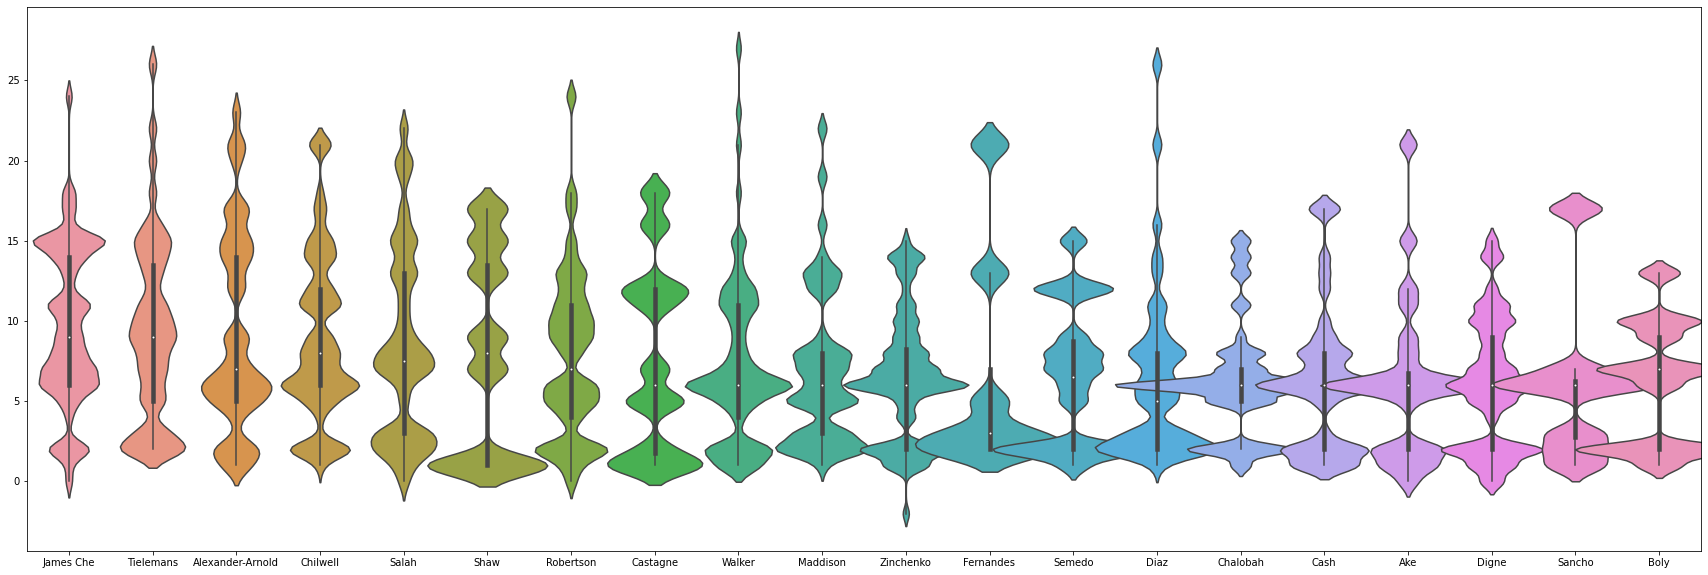

In [91]:
rcParams['figure.figsize'] = 30,10
sns.violinplot(data=z,bw=0.1,width=3)
